#Notes:

Dataset not balanced. Oversample or undersample?

| Left | Count |
|------|-------|
| 0    | 11428 |
| 1    | 3571  |


---



# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [13]:
df = pd.read_excel('HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


#Cleaning

In [15]:
# Handle categorical variables: 'Department' and 'salary'
df = pd.get_dummies(df, columns=['Department', 'salary'])

df.dropna(inplace=True)
df = df.drop(['Emp_Id'], axis=1)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  uint8  
 9   Department_RandD        14999 non-null  uint8  
 10  Department_accounting   14999 non-null  uint8  
 11  Department_hr           14999 non-null  uint8  
 12  Department_management   14999 non-null  uint8  
 13  Department_marketing    14999 non-null  uint8  
 14  Department_product_mng  14999 non-null

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

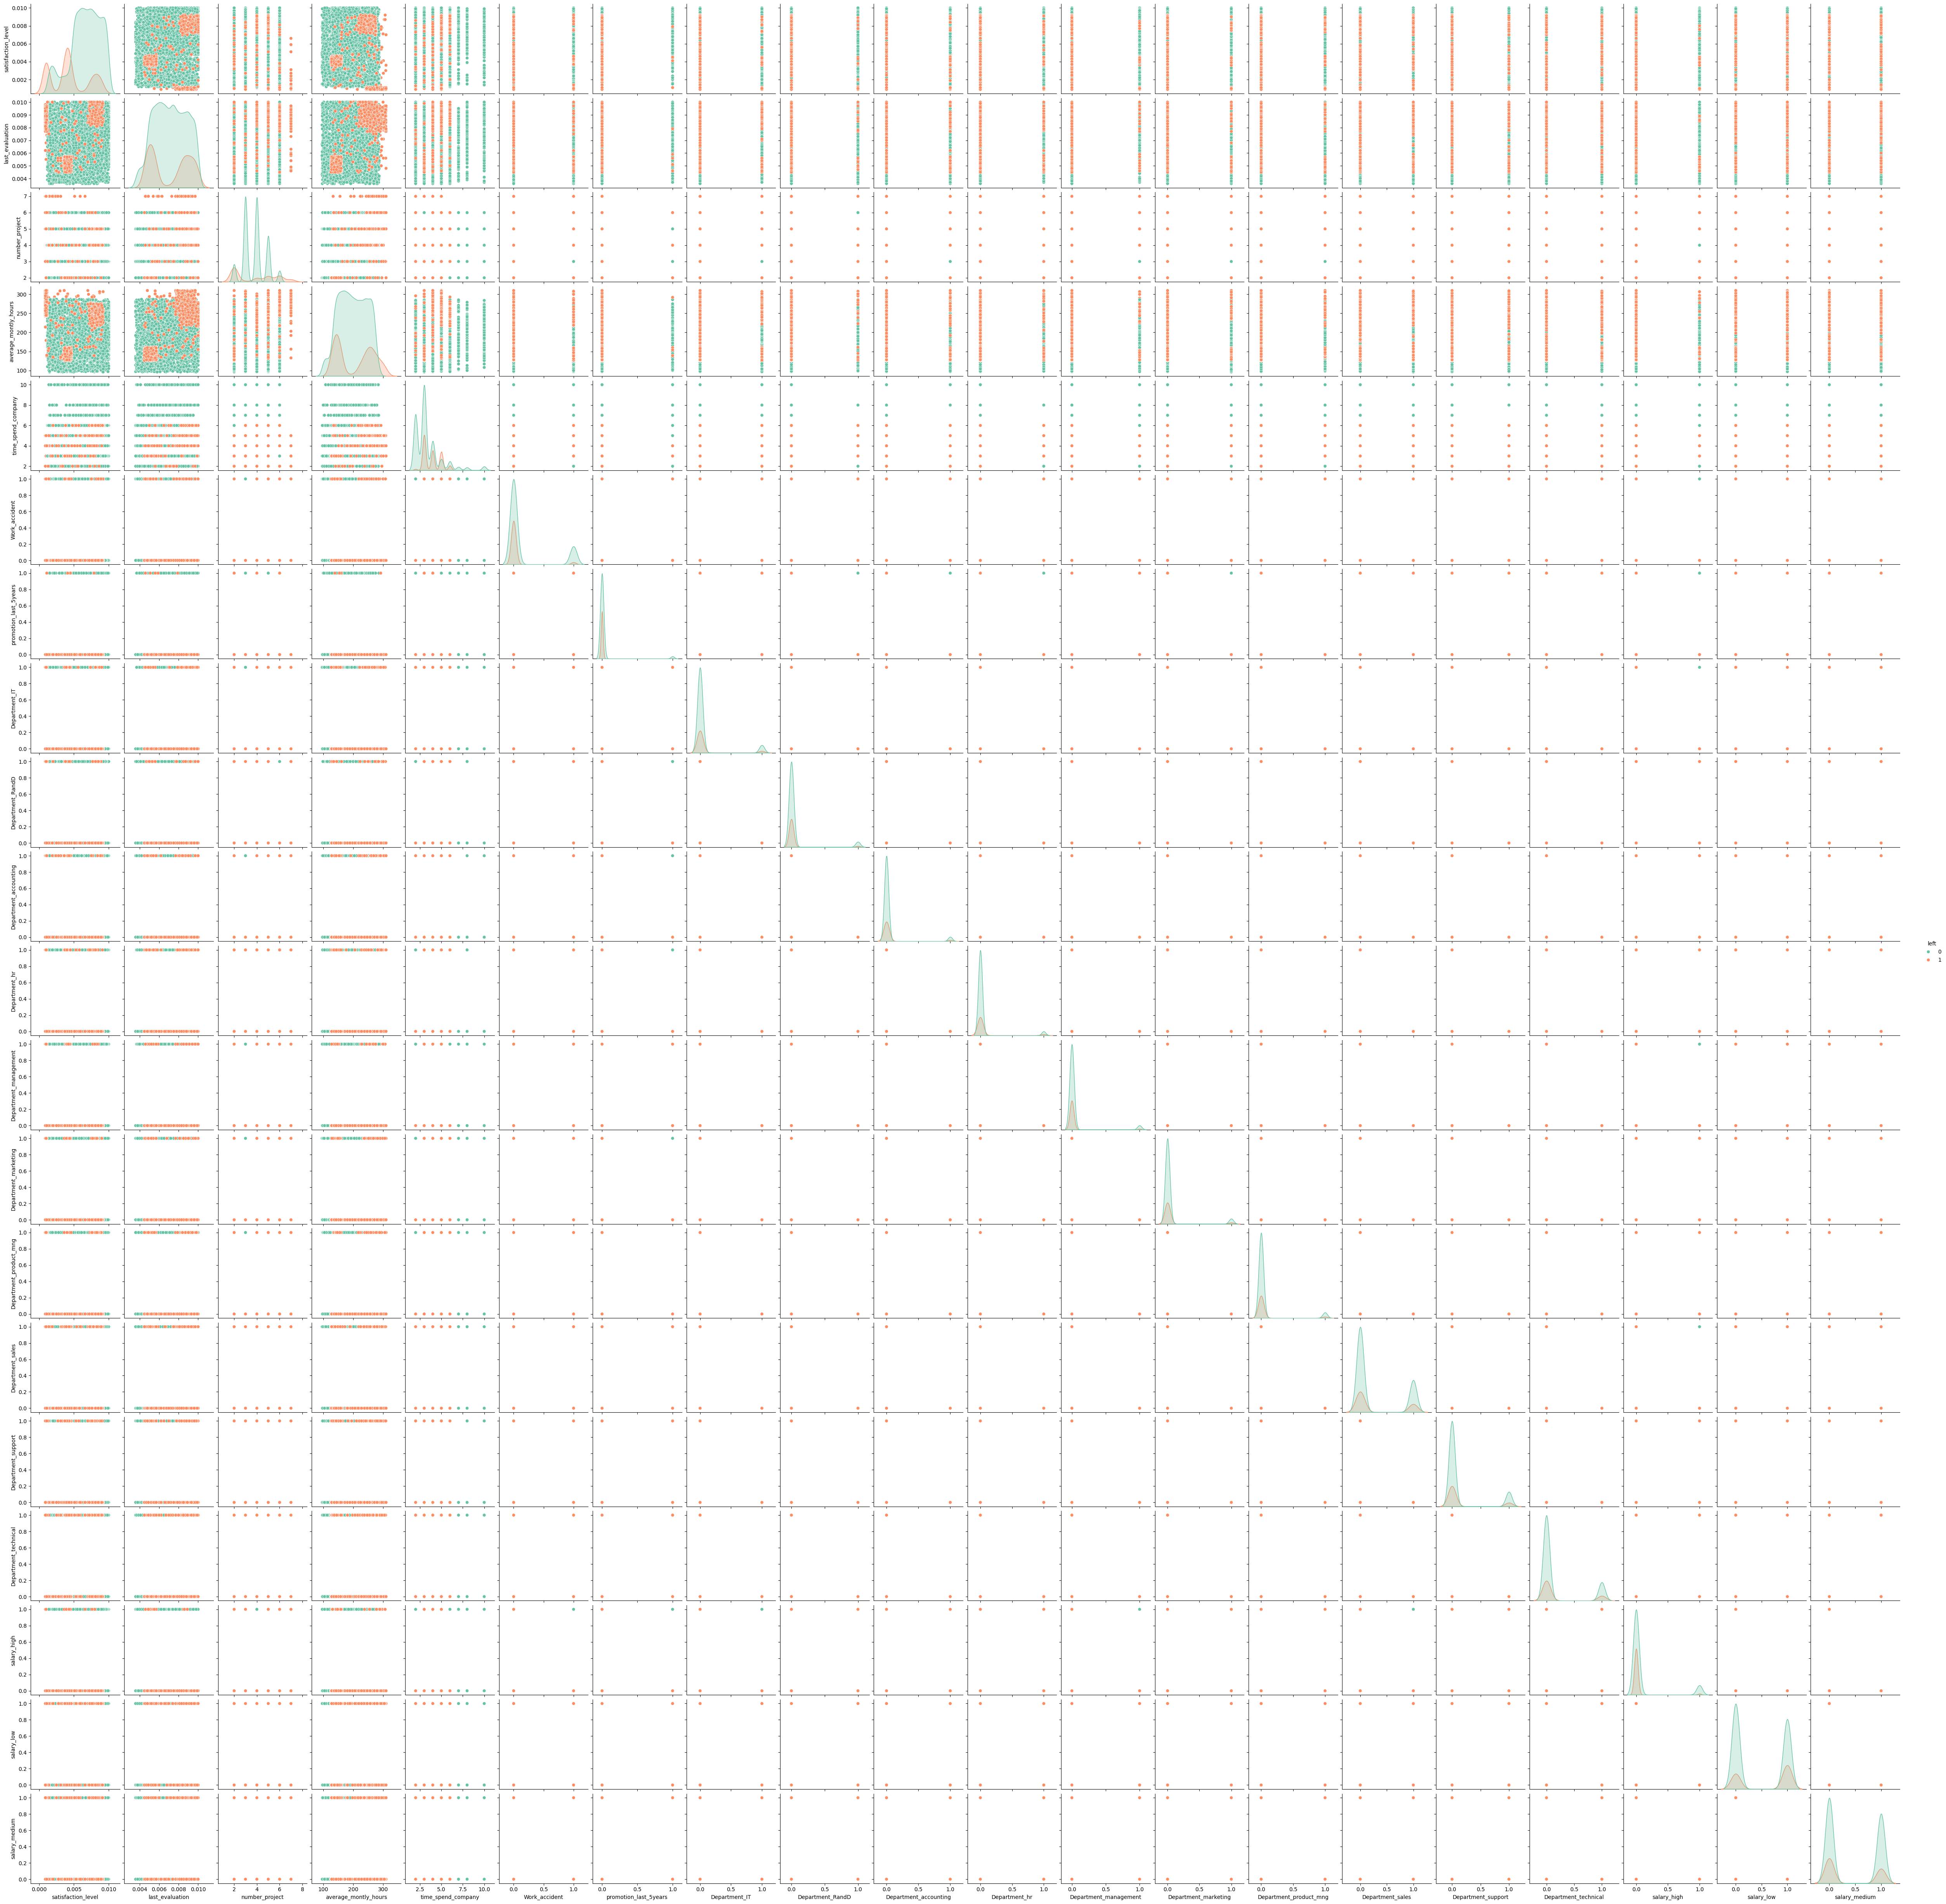

In [ ]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

# sns.pairplot(df, diag_kind='kde', hue='left')
# plt.show()

sns.pairplot(df, hue='left', palette='Set2')
plt.show()

#K-Means

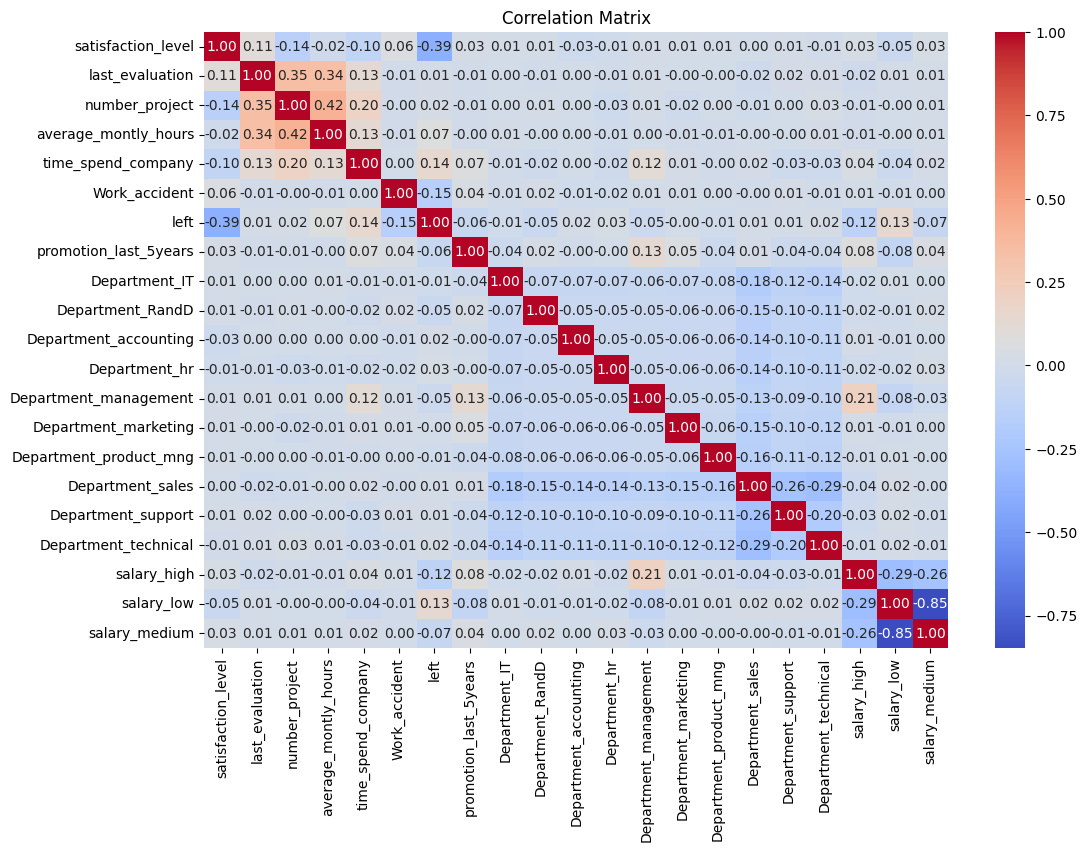

In [17]:
# Calculate and visualise correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Identify important features based on correlation with the target variable ('left')
important_features = correlation_matrix['left'].sort_values(ascending=False)
print("Important Features:")
print(important_features)

# Choose features with high absolute correlation values with the target variable
selected_features = ['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'number_project']
selected_features += ['last_evaluation', 'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']

df_subset = df[selected_features]

print("DataFrame with Selected Features:")
df_subset.head()

Important Features:
left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_IT            -0.010925
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
salary_high              -0.120929
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64
DataFrame with Selected Features:


,satisfaction_level,time_spend_company,average_montly_hours,number_project,last_evaluation,Work_accident,promotion_last_5years,salary_low,salary_medium,salary_high
0,0.38,3,157,2,0.53,0,0,1,0,0
1,0.80,6,262,5,0.86,0,0,0,1,0
2,0.11,4,272,7,0.88,0,0,0,1,0
3,0.72,5,223,5,0.87,0,0,1,0,0
4,0.37,3,159,2,0.52,0,0,1,0,0


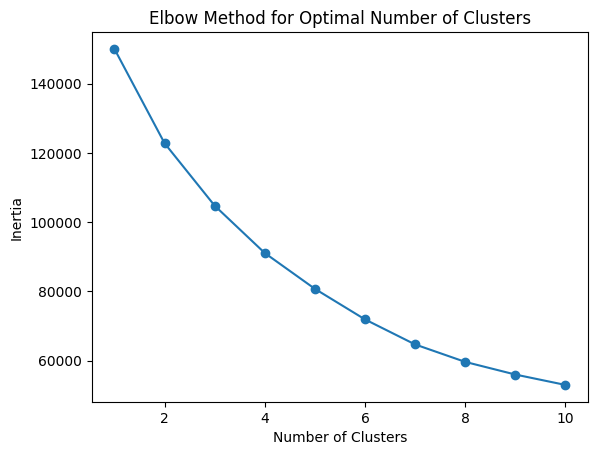

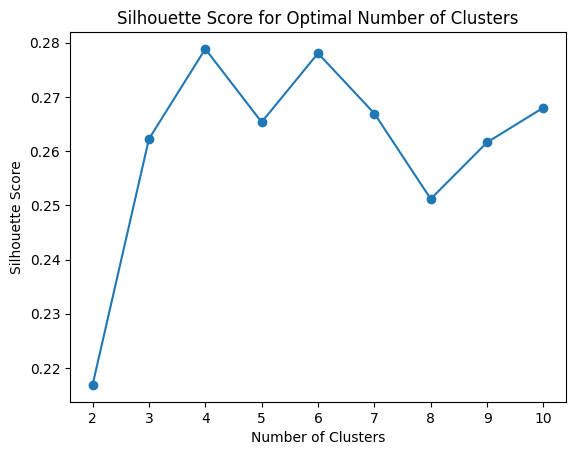

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)


# Elbow method
inertia_values = []
num_clusters_range = range(1, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Print inertia values for each number of clusters
# print("Number of Clusters | Inertia")
# for num_clusters, inertia in zip(num_clusters_range, inertia_values):
#     print(f"{num_clusters:18d} | {inertia:.2f}")

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()




# Silhouette scores methof
silhouette_scores = []
num_clusters_range = range(2, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [26]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Analyze and interpret clusters
cluster_summary = df.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
cluster_summary

Cluster Summary:


,satisfaction_level,time_spend_company,average_montly_hours,number_project,last_evaluation,Work_accident,promotion_last_5years,salary_low,salary_medium,salary_high
cluster,,,,,,,,,,
0,0.650351,3.011643,185.966365,3.343929,0.670686,0.159490,0.0,1.000000,0.000000,0.000000
1,0.658411,3.424447,195.862379,3.632261,0.705564,0.150761,0.0,0.000000,1.000000,0.000000
2,0.393672,4.683190,249.806466,5.324138,0.855034,0.078017,0.0,0.792672,0.207328,0.000000
3,0.656019,4.166144,199.849530,3.752351,0.706019,0.238245,1.0,0.206897,0.567398,0.225705
4,0.636910,3.581974,200.102146,3.768240,0.705451,0.151931,0.0,0.000000,0.000000,1.000000


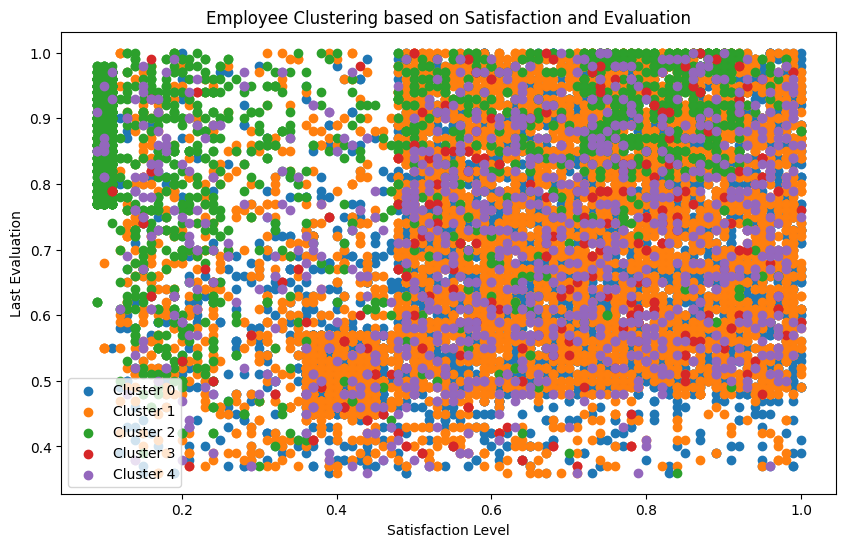

In [27]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df[df['cluster'] == cluster]['satisfaction_level'], df[df['cluster'] == cluster]['last_evaluation'], label=f'Cluster {cluster}')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clustering based on Satisfaction and Evaluation')
plt.legend()
plt.show()

- **Cluster 0:** This cluster represents employees with a moderately high satisfaction level (0.650), average time spent in the company (3.012 years), and moderate workload. They have a relatively low occurrence of work accidents (0.159) and are mostly in low-salary positions (1.0).
- **Cluster 1:** Employees in this cluster have similar satisfaction levels to Cluster 0 but slightly longer tenure (3.424 years) and higher average monthly hours (196). They are more evenly distributed across salary levels.
- **Cluster 2:** This cluster represents employees with lower satisfaction levels (0.394), longer tenure (4.683 years), and higher workload compared to other clusters. They have a significantly higher last evaluation score (0.855) and are primarily in low-salary positions (0.793).
- **Cluster 3:** Employees in this cluster have similar satisfaction levels to Cluster 0 and 1 but longer tenure (4.166 years) and slightly higher work accident rates (0.238). They have a mix of salary levels, with a relatively higher proportion in medium-salary positions (0.567).
- **Cluster 4:** This cluster represents employees with similar characteristics to Cluster 0 and 1 in terms of satisfaction level, but slightly longer tenure (3.582 years) and similar workload. They are mostly in high-salary positions (1.0).

Overall, these clusters provide insights into different groups of employees based on their satisfaction levels, tenure, workload, and salary levels.